In [2]:
from pydub import AudioSegment
import numpy as np
import scipy.signal as signal
import os

In [4]:
pip install scipy


In [12]:
audio = AudioSegment.from_file("processed_audio_multi.wav")


In [14]:
from pydub import AudioSegment
import numpy as np
import scipy.signal  # Make sure this import is included


# Convert to numpy array
samples = np.array(audio.get_array_of_samples())

# Apply a simple noise reduction filter (low-pass filter in this case)
# Define the low-pass filter parameters
fs = audio.frame_rate  # sample rate
cutoff = 1000  # cutoff frequency (1kHz)

# Create a low-pass filter using scipy
nyquist = 0.5 * fs
normal_cutoff = cutoff / nyquist
b, a = scipy.signal.butter(1, normal_cutoff, btype='low')

# Apply the filter to the samples
filtered_samples = scipy.signal.filtfilt(b, a, samples)

# Convert the filtered samples back to audio
filtered_audio = audio._spawn(filtered_samples.astype(np.int16).tobytes())

# Export the filtered audio to a new file
filtered_audio.export(r"C:\Users\Welcome\Downloads\filtered_audio.wav", format="wav")


<_io.BufferedRandom name='C:\\Users\\Welcome\\Downloads\\filtered_audio.wav'>

In [16]:
try:
    # Export the filtered audio to a new file
    filtered_audio.export(r"C:\Users\Welcome\Downloads\filtered1_audio.wav", format="wav")
    print("Filtered audio saved successfully!")
except Exception as e:
    print(f"Error saving audio: {e}")


Filtered audio saved successfully!


In [4]:
import librosa
import numpy as np
import soundfile as sf

# Load clean speech
speech, sr_speech = librosa.load('WhatsApp Ptt 2025-01-02 at 18.56.07 (1).wav', sr=None)

# Load background noise
noise, sr_noise = librosa.load('heavy-rain-240706.wav', sr=None)

# Ensure both audio files have the same length
min_length = min(len(speech), len(noise))
speech = speech[:min_length]
noise = noise[:min_length]

# Mix the audio (adjust noise level by scaling)
noise_level = 0.3  # Scale down noise
noisy_audio = speech + noise_level * noise

# Save the resulting noisy audio
sf.write('noisy_audio.wav', noisy_audio, sr_speech)

print("Noisy audio generated and saved as 'noisy_audio.wav'")

Noisy audio generated and saved as 'noisy_audio.wav'


In [23]:
!pip install numpy==2.0


     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.9 kB 217.9 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/60.9 kB 217.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.9 kB 217.9 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.9 kB 260.9 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 249.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.5 MB 1.7 MB/s eta 0:00:10
   ---------------------------------------- 0.1/16.5 MB 1.7 MB/s eta 0:00:10
    --------------------------------------- 0.3/16.5 MB 1.9 MB/s eta 0:00:09
    --------------------------------------- 0.4/16.5 MB 1.9 MB/s eta 0:00:09
   - -------------------------------------- 0.5/16.5 MB 2.1 MB/s eta 0:00:08
 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install librosa


  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata (14 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp312-abi3-win_amd64.whl.metadata (5.6 kB)
Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
Using cached soxr-0.5.0.post1-cp312-abi3-win_amd64.whl (164 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install sounddevice numpy scipy


Note: you may need to restart the kernel to use updated packages.


In [37]:
import sounddevice as sd
import numpy as np
import wave

# Define the parameters
fs = 44100  # Sample rate (samples per second)
duration = 5  # Duration of recording in seconds
channels = 1  # Mono recording

# Record audio
print("Recording...")
audio_data = sd.rec(int(duration * fs), samplerate=fs, channels=channels)
sd.wait()  # Wait until recording is finished
print("Recording complete")

# Save the recorded audio to a WAV file
file_name = "recorded_audio.wav"
with wave.open(file_name, 'wb') as wf:
    wf.setnchannels(channels)
    wf.setsampwidth(2)  # 2 bytes per sample (16 bits)
    wf.setframerate(fs)
    wf.writeframes(audio_data.tobytes())

print(f"Audio saved to {file_name}")


Recording...
Recording complete
Audio saved to recorded_audio.wav


In [20]:
import librosa
import numpy as np
import librosa.display
import soundfile as sf

def spectral_gate(audio_path, output_path, threshold=0.02):
    y, sr = librosa.load(audio_path, sr=None)
    spectrogram = librosa.stft(y)
    magnitude, phase = np.abs(spectrogram), np.angle(spectrogram)

    # Noise thresholding
    noise_gate = magnitude > threshold * np.max(magnitude)
    filtered_magnitude = magnitude * noise_gate

    # Reconstruct signal
    filtered_spectrogram = filtered_magnitude * np.exp(1j * phase)
    filtered_audio = librosa.istft(filtered_spectrogram)
    sf.write(output_path, filtered_audio, sr)
spectral_gate("processed_audio_multi.wav", "filtered_audio_spectral.wav")


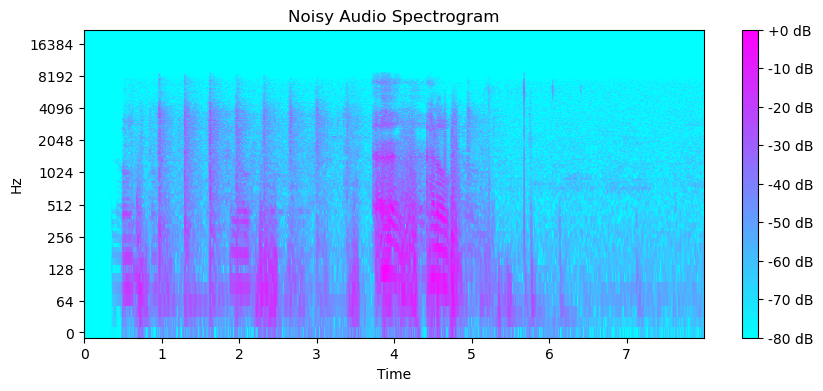

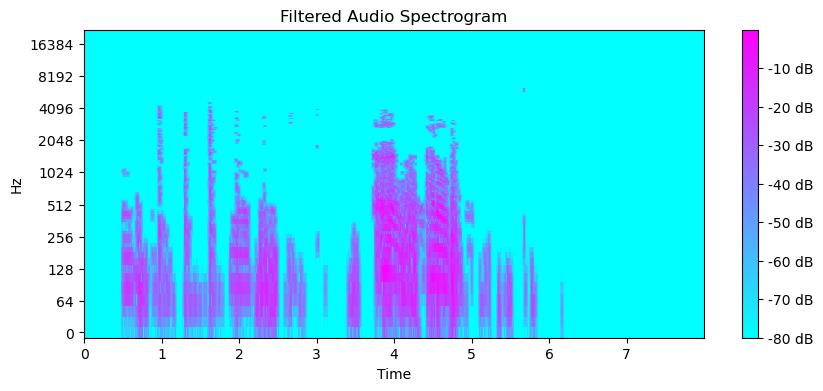

In [24]:
import matplotlib.pyplot as plt
import librosa.display

# Plot original spectrogram
y_noisy, sr = librosa.load("processed_audio_multi.wav", sr=None)
S_noisy = librosa.amplitude_to_db(np.abs(librosa.stft(y_noisy)), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_noisy, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title('Noisy Audio Spectrogram')
plt.show()

# Plot filtered spectrogram
y_filtered, sr = librosa.load("filtered_audio_spectral.wav", sr=None)
S_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(y_filtered)), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_filtered, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Audio Spectrogram')
plt.show()


In [45]:
class AudioProcessor:
    def __init__(self):
        self.p = pyaudio.PyAudio()
        self.input_stream = None
        self.output_stream = None
        self.model = get_model(name="mdx_extra")  # Load Demucs pre-trained model
        self.model.eval()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def start_stream(self):
        self.input_stream = self.p.open(format=pyaudio.paInt16,
                                        channels=1,
                                        rate=44100,
                                        input=True,
                                        frames_per_buffer=1024)
        self.output_stream = self.p.open(format=pyaudio.paInt16,
                                         channels=1,
                                         rate=44100,
                                         output=True)

    def stop_stream(self):
        self.input_stream.stop_stream()
        self.input_stream.close()
        self.output_stream.stop_stream()
        self.output_stream.close()
        self.p.terminate()

    def process_audio(self, audio_chunk):
        audio_array = np.frombuffer(audio_chunk, dtype=np.int16)
        stereo_audio_array = np.stack([audio_array, audio_array], axis=0)
        
        audio_tensor = torch.tensor(stereo_audio_array, dtype=torch.float32, device=self.device).unsqueeze(0) / 32768.0

        
        with torch.no_grad():
            sources = apply_model(self.model, audio_tensor, split=True, overlap=0.25)
        
        vocals = sources[0, 0].cpu().numpy() * 32768.0
        vocals = vocals.astype(np.int16).tobytes()
        
        return vocals

    def save_processed_audio(self, processed_audio, filename):
        wf = wave.open(filename, 'wb')
        wf.setnchannels(1)
        wf.setsampwidth(self.p.get_sample_size(pyaudio.paInt16))
        wf.setframerate(44100)
        wf.writeframes(processed_audio)
        wf.close()


def main():
    audio_processor = AudioProcessor()
    audio_processor.start_stream()
    processed_audio_chunks = []

    try:
        print("Recording and processing audio... Press Ctrl+C to stop.")
        while True:
            audio_chunk = audio_processor.input_stream.read(1024, exception_on_overflow=False)
            processed_audio = audio_processor.process_audio(audio_chunk)
            processed_audio_chunks.append(processed_audio)
    except KeyboardInterrupt:
        print("Stopping...")
    finally:
        audio_processor.stop_stream()
        audio_processor.save_processed_audio(b''.join(processed_audio_chunks), 'processed_output.wav')
        print("Processed audio saved as 'processed_output.wav'")


if __name__ == "__main__":
    main()


Recording and processing audio... Press Ctrl+C to stop.
Stopping...
Processed audio saved as 'processed_output.wav'
